In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
#Mounting google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
# Importing the dataset

In [2]:
!mkdir ~/.kaggle

In [3]:
!pwd

/content


In [5]:
!cp /content/gdrive/MyDrive/Portfolio_Projects/Daily_Practice/kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                 📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          21606        463  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024           Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          16036        338  1.0              
ihelon/coffee-sales                                         Coffee Sales                                         11KB  2024-07-18 10:06:43           6795        104  1.0              
armanmanteghi/supermarket-sales-insights-and-optimization   Supermarket Sales: I

In [9]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 144MB/s]


In [10]:
!unzip /content/new-york-city-airbnb-open-data.zip

Archive:  /content/new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


## Exploring the Data

In [13]:
# load
data_path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(data_path)

In [41]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

## EDA?

In [42]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [43]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [44]:
NOR = df[df['reviews_per_month'].isna() == True]['number_of_reviews']

In [46]:
NOR.unique()

array([0])

### Room Type??

In [18]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

### PRice?

In [21]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
Price_entr_home = (df[df['room_type'] == 'Entire home/apt']['price'])

In [27]:
Price_entr_home.describe()

count    25409.000000
mean       211.794246
std        284.041611
min          0.000000
25%        120.000000
50%        160.000000
75%        229.000000
max      10000.000000
Name: price, dtype: float64

In [28]:
Price_priv_room = (df[df['room_type'] == 'Private room']['price'])

In [29]:
Price_priv_room.describe()

count    22326.000000
mean        89.780973
std        160.205262
min          0.000000
25%         50.000000
50%         70.000000
75%         95.000000
max      10000.000000
Name: price, dtype: float64

In [30]:
Price_shared_room = (df[df['room_type'] == 'Shared room']['price'])

In [32]:
Price_shared_room.describe()

count    1160.000000
mean       70.127586
std       101.725252
min         0.000000
25%        33.000000
50%        45.000000
75%        75.000000
max      1800.000000
Name: price, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [36]:
## Important columns for Market trends can be
# room_type, price, number of reviews, calculated_host_listing_count, availability_365

In [ ]:
## Important parameters according to me
# latitude	longitude	room_type	price	minimum_nights


# Exploratory Data Analysis

In [47]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [50]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here we are trying to find the locationwise relation/ patterns in the data, room type & price of rooms.



Thus the reviews value does not matter. For this reason, I will drop the columns containing information about the reviews.

In [52]:
df_edited = df.drop(columns = ['last_review','number_of_reviews','reviews_per_month'], axis=1)

In [53]:
df_edited.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  calculated_host_listings_count  \
0     Private room    149               1                               6   
1  Entire home/apt    225               1                               2   
2     Private room    150               3                               1   
3  Entire home/apt     89               1                               1   
4  Entire home/apt     80              10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

In [54]:
df_edited.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [56]:
df_edited[df_edited['name'].isna()]

id name   host_id host_name neighbourhood_group  \
2854    1615764  NaN   6676776     Peter           Manhattan   
3703    2232600  NaN  11395220      Anna           Manhattan   
5775    4209595  NaN  20700823     Jesse           Manhattan   
5975    4370230  NaN  22686810   Michaël           Manhattan   
6269    4581788  NaN  21600904     Lucie            Brooklyn   
6567    4756856  NaN   1832442  Carolina            Brooklyn   
6605    4774658  NaN  24625694      Josh           Manhattan   
8841    6782407  NaN  31147528  Huei-Yin            Brooklyn   
11963   9325951  NaN  33377685  Jonathan           Manhattan   
12824   9787590  NaN  50448556    Miguel           Manhattan   
13059   9885866  NaN  37306329  Juliette           Manhattan   
13401  10052289  NaN  49522403   Vanessa            Brooklyn   
15819  12797684  NaN  69715276       Yan           Manhattan   
16071  12988898  NaN  71552588    Andrea               Bronx   
18047  14135050  NaN  85288337      Jeff            Brooklyn   
28889  22275821  NaN  49662398  Kathleen            Brooklyn   

            neighbourhood  latitude  longitude        room_type  price  \
2854    Battery Park City  40.71239  -74.01620  Entire home/apt    400   
3703         East Village  40.73215  -73.98821  Entire home/apt    200   
5775    Greenwich Village  40.73473  -73.99244  Entire home/apt    225   
5975               Nolita  40.72046  -73.99550  Entire home/apt    215   
6269         Williamsburg  40.71370  -73.94378     Private room    150   
6567             Bushwick  40.70046  -73.92825     Private room     70   
6605   Washington Heights  40.85198  -73.93108     Private room     40   
8841         Williamsburg  40.71354  -73.93882     Private room     45   
11963      Hell's Kitchen  40.76436  -73.98573  Entire home/apt    190   
12824              Harlem  40.80316  -73.95189  Entire home/apt    300   
13059           Chinatown  40.71632  -73.99328     Private room     67   
13401         Brownsville  40.66409  -73.92314     Private room     50   
15819     Upper West Side  40.79843  -73.96404     Private room    100   
16071             Fordham  40.86032  -73.88493      Shared room    130   
18047  Bedford-Stuyvesant  40.69421  -73.93234     Private room     70   
28889            Bushwick  40.69546  -73.92741  Entire home/apt    110   

       minimum_nights  calculated_host_listings_count  availability_365  
2854             1000                               1               362  
3703                1                               1               341  
5775                1                               1                 0  
5975                7                               1                 0  
6269                1                               1                 0  
6567                1                               1                 0  
6605                1                               1                 0  
8841                1                               1                 0  
11963               4                               1                 0  
12824               5                               5                 0  
13059               4                               1                 0  
13401               3                               1               362  
15819               1                               2                 0  
16071               1                               1               365  
18047               3                               1                 0  
28889               4                               1                 0

In [55]:
df_edited[df_edited['host_name'].isna()]

id                                               name    host_id  \
360      100184                                          Bienvenue     526653   
2700    1449546                            Cozy Studio in Flatbush    7779204   
5745    4183989    SPRING in the City!! Zen-Style Tranquil Bedroom     919218   
6075    4446862                 Charming Room in Prospect Heights!   23077718   
6582    4763327                Luxurious, best location, spa inc'l   24576978   
8163    6292866                          Modern Quiet Gem Near All   32722063   
8257    6360224                    Sunny, Private room in Bushwick   33134899   
8852    6786181                       R&S Modern Spacious Hideaway   32722063   
9138    6992973                    1 Bedroom in Prime Williamsburg    5162530   
9817    7556587                               Sunny Room in Harlem   39608626   
14040  10709846                 Sunny, spacious room in Greenpoint    7822683   
14631  11553543                                  Cozy Room Astoria   26138712   
15174  12113879     Sunny, Large West Village 1 BR Near Everything    5300585   
19565  15648096              Spacious 2 bedroom close to Manhattan  100971588   
27777  21787094         Spacious and Bright Midtown East Apartment     415290   
27962  21867710  Amazing room in the centre on Manhatten! Welcome!  159156636   
28042  21901156  Best Deal! Lovely place in Manhattan! Time Squ...  159156636   
28274  21990808                 ***SLEEPING IN THE GOLDEN PLACE***  159156636   
30570  23660605    Private Bedroom w/ Balcony view of Central Park  177146433   
32193  25180572                     Beautiful Cozy Studio Apt. UWS  119609345   
38992  30468335            LARGE Prospect Lefferts Gardens Bedroom  228750026   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
360         NaN              Queens    Queens Village  40.72413  -73.76133   
2700        NaN            Brooklyn          Flatbush  40.64965  -73.96154   
5745        NaN           Manhattan            Harlem  40.80606  -73.95061   
6075        NaN            Brooklyn     Crown Heights  40.67512  -73.96146   
6582        NaN            Brooklyn        Greenpoint  40.72035  -73.95355   
8163        NaN            Brooklyn     East Flatbush  40.65263  -73.93215   
8257        NaN            Brooklyn          Bushwick  40.70146  -73.92792   
8852        NaN            Brooklyn     East Flatbush  40.64345  -73.93643   
9138        NaN            Brooklyn      Williamsburg  40.71838  -73.95630   
9817        NaN           Manhattan            Harlem  40.82929  -73.94182   
14040       NaN            Brooklyn        Greenpoint  40.73539  -73.95838   
14631       NaN              Queens  Ditmars Steinway  40.77587  -73.91775   
15174       NaN           Manhattan           Chelsea  40.73949  -73.99801   
19565       NaN               Bronx        Highbridge  40.83844  -73.92489   
27777       NaN           Manhattan   Upper East Side  40.76436  -73.96836   
27962       NaN           Manhattan    Hell's Kitchen  40.75668  -73.99097   
28042       NaN           Manhattan    Hell's Kitchen  40.75656  -73.99063   
28274       NaN           Manhattan    Hell's Kitchen  40.75835  -73.99065   
30570       NaN           Manhattan       East Harlem  40.79766  -73.94824   
32193       NaN           Manhattan   Upper West Side  40.77701  -73.97667   
38992       NaN            Brooklyn          Flatbush  40.65152  -73.95271   

             room_type  price  minimum_nights  calculated_host_listings_count  \
360       Private room     50               1                               1   
2700   Entire home/apt    100              30                               1   
5745      Private room     86               3                               1   
6075      Private room     50               1                               1   
6582   Entire home/apt    195               1                               1   
8163   Entire home/apt     

In [57]:
df_edited.shape

(48895, 13)

In [60]:
df_edited =df_edited.dropna()

In [61]:
df_edited.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  calculated_host_listings_count  \
0     Private room    149               1                               6   
1  Entire home/apt    225               1                               2   
2     Private room    150               3                               1   
3  Entire home/apt     89               1                               1   
4  Entire home/apt     80              10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

In [62]:
df_edited.describe()

id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  calculated_host_listings_count  availability_365  
count    48858.000000                    48858.000000      48858.000000  
mean         7.012444                        7.148369        112.801425  
std         20.019757                       32.964600        131.610962  
min          1.000000                        1.000000          0.000000  
25%          1.000000                        1.000000          0.000000  
50%          3.000000                        1.000000         45.000000  
75%          5.000000                        2.000000        227.000000  
max       1250.000000                      327.000000        365.000000

In [63]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  calculated_host_listings_count  48858 non-null  int64  
 12  availability_365                48858

In [65]:
df_edited.drop_duplicates().shape == df_edited.shape

True

# Analysis on Data

### Summarising

In [66]:
df_edited.describe()

id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  calculated_host_listings_count  availability_365  
count    48858.000000                    48858.000000      48858.000000  
mean         7.012444                        7.148369        112.801425  
std         20.019757                       32.964600        131.610962  
min          1.000000                        1.000000          0.000000  
25%          1.000000                        1.000000          0.000000  
50%          3.000000                        1.000000         45.000000  
75%          5.000000                        2.000000        227.000000  
max       1250.000000                      327.000000        365.000000

In [70]:
df_edited['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<ipython-input-83-bd79191a222d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_edited,x='room_type', palette='Set2')


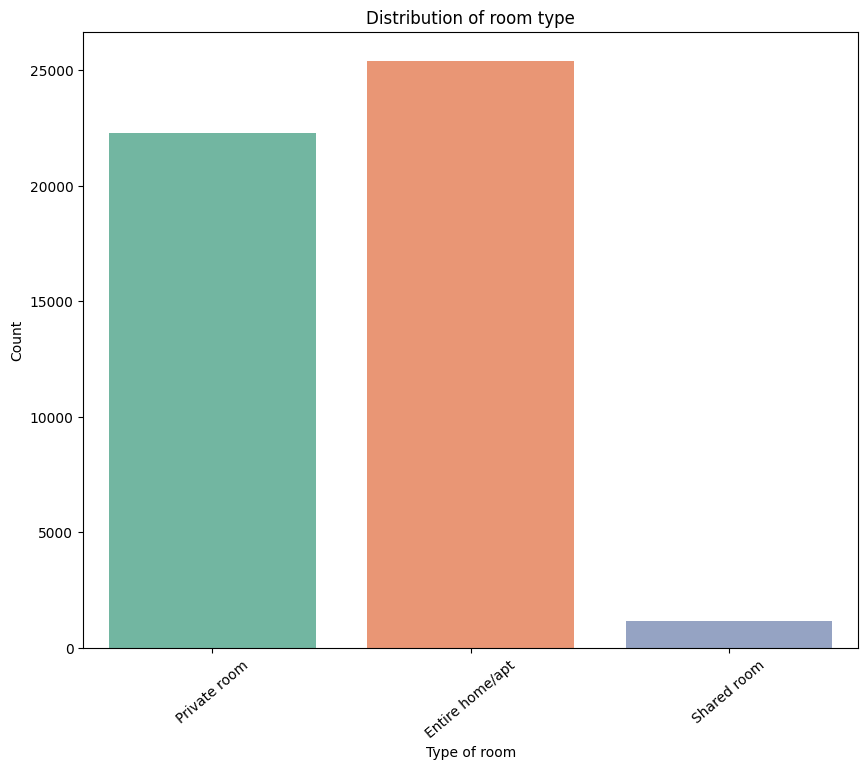

In [83]:
# PLot
plt.figure(figsize=(10,8))
sns.countplot(data=df_edited,x='room_type', palette='Set2')
plt.title("Distribution of room type")
plt.xlabel('Type of room')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.show()

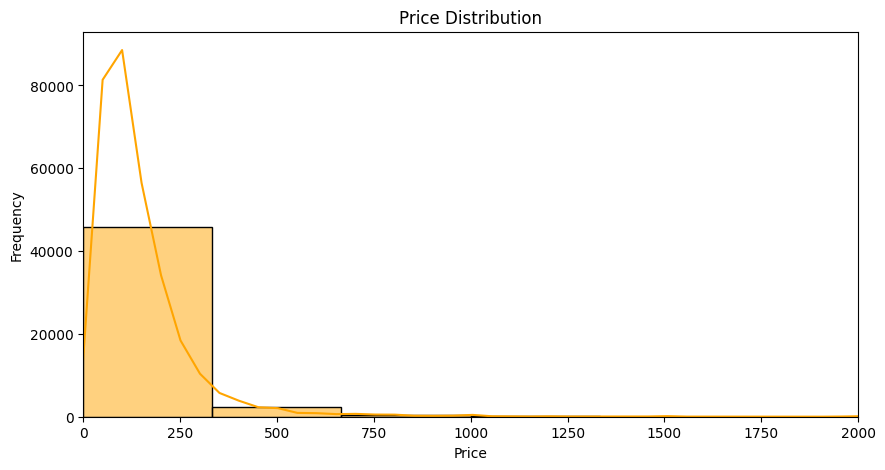

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_edited['price'], bins=30, kde=True, color='orange')
plt.title("Price Distribution")
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.xticks(rotation=40)
plt.xlim(0, 2000)
plt.show()

In [94]:
avg_price_by_room_type = df_edited.groupby('room_type')['price'].mean().sort_values()
avg_price_by_room_type

room_type
Shared room         70.075928
Private room        89.794360
Entire home/apt    211.806994
Name: price, dtype: float64

In [96]:
avg_price_by_room_type.values

array([ 70.07592752,  89.79436026, 211.80699405])

<ipython-input-99-395c8f51163f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, palette='viridis')


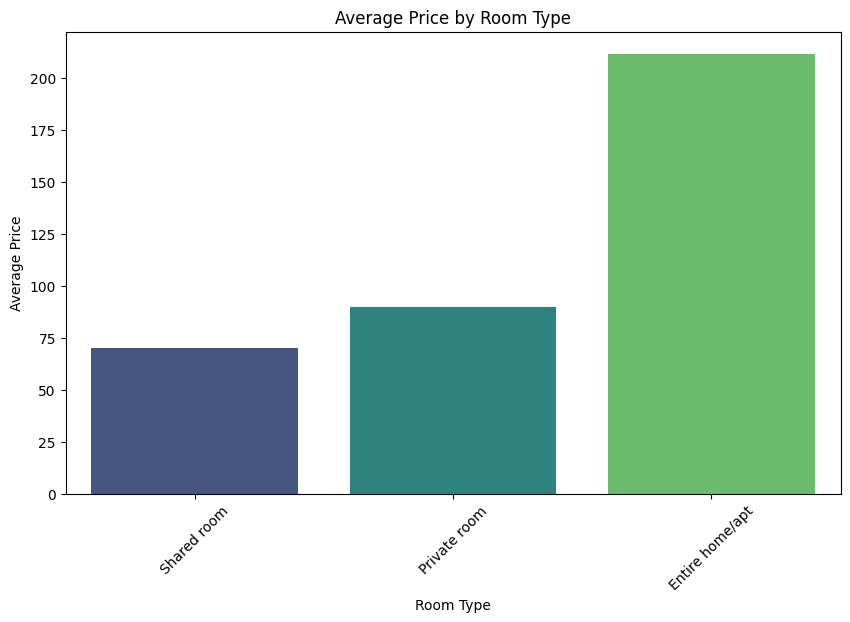

In [99]:
avg_price_by_room_type = df_edited.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, palette='viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Geospatial Data Analysis

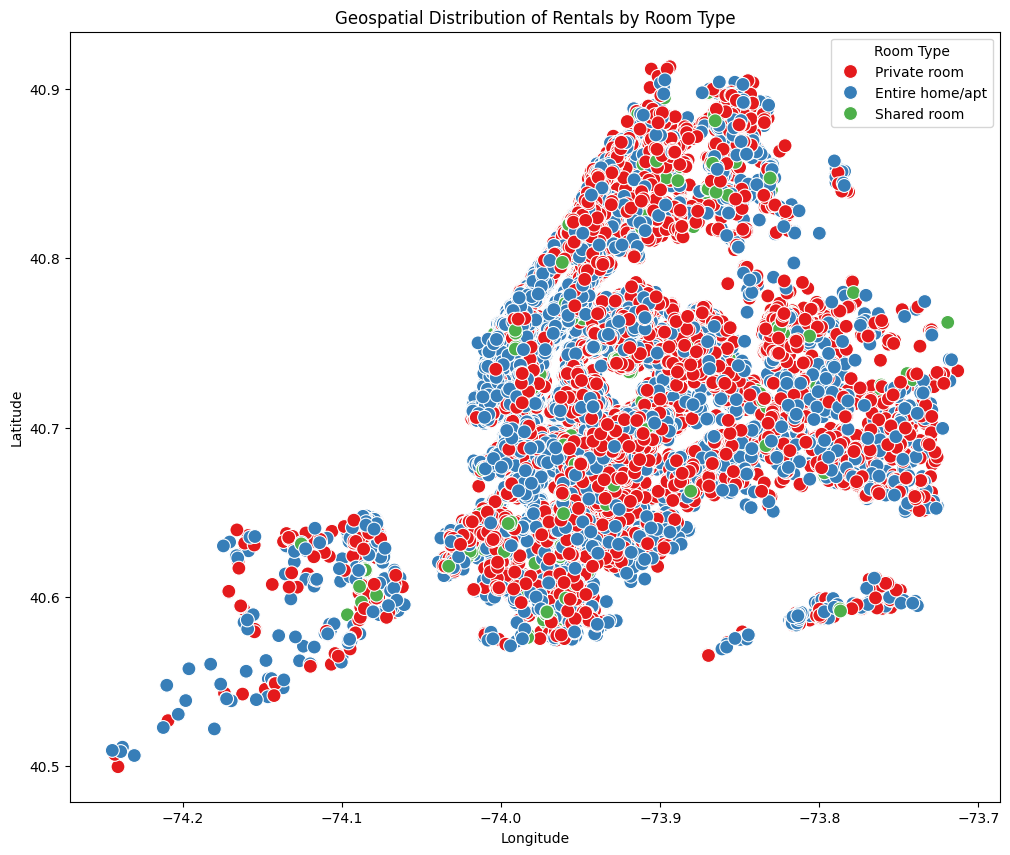

In [102]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_edited, x='longitude', y='latitude', hue='room_type', palette='Set1', s=100)
plt.title('Geospatial Distribution of Rentals by Room Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type', loc='upper right')
plt.show()

### correlation

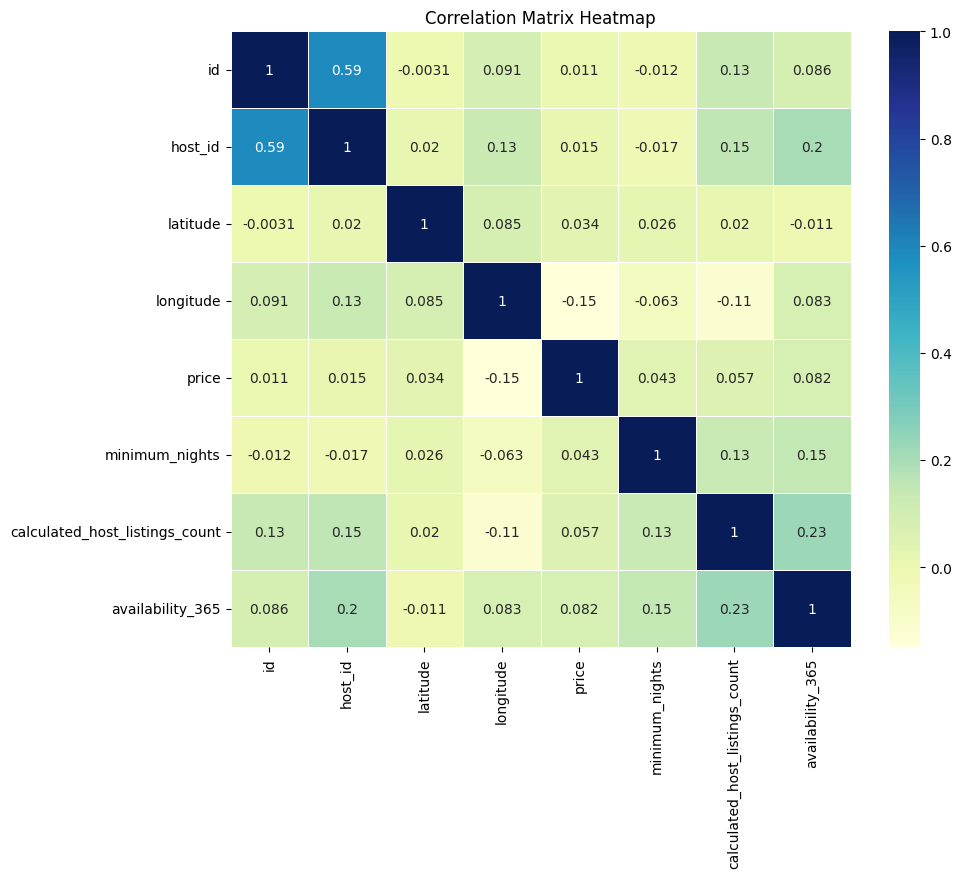

In [103]:
# Extracting numeric columns
numeric_columns = df_edited.select_dtypes(include=['number'])

# Correlation analysis for numeric columns
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Top Hosts

<ipython-input-110-4540563c6397>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="viridis")


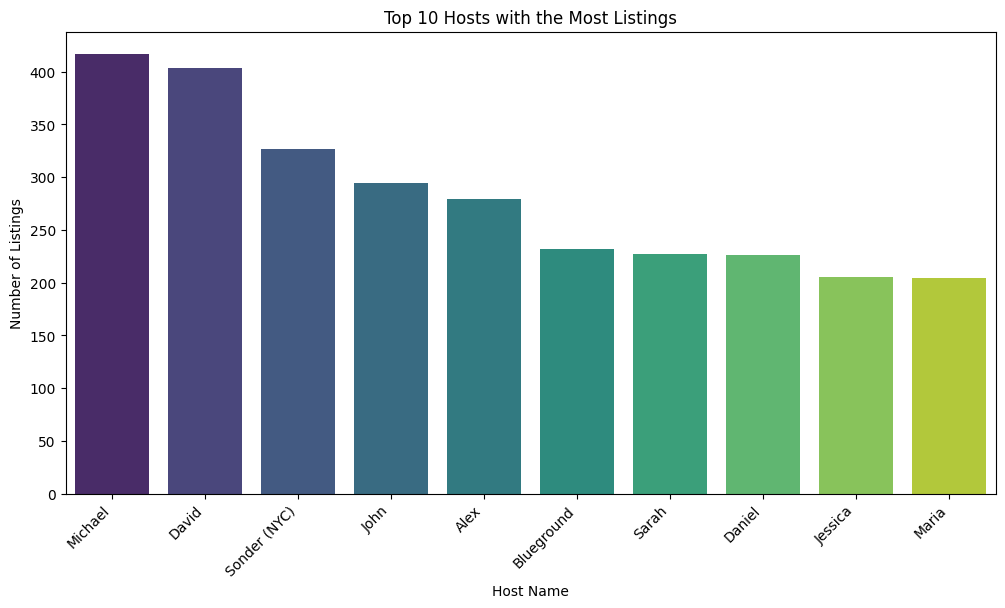

In [110]:
top_hosts = df_edited['host_name'].value_counts().head(10)


# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="viridis")
plt.title('Top 10 Hosts with the Most Listings')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.show()

### Geospatial Analysis -> Cluster Using Centroids

In [116]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around the mean latitude and longitude
map_center = [df_edited['latitude'].mean(), df_edited['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each listing to the cluster
for index, row in df_edited.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['name']} - {row['room_type']}",
    ).add_to(marker_cluster)

# Display the map
mymap

In [117]:
import html

In [118]:
# Save the map to an HTML file
mymap.save('map.html')

# Optionally, open the map automatically in a web browser (optional, and may require additional libraries)
import webbrowser
webbrowser.open('/content/map.html')


False

In [121]:
from IPython.display import display, HTML

In [123]:
display(HTML('/content/map.html'))


In [112]:
import folium

In [115]:
from folium.plugins import MarkerCluster

# Create a map centered around the mean latitude and longitude
map_center = [df_edited['latitude'].mean(), df_edited['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers for each listing to the cluster
for index, row in df_edited.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['name']} - {row['room_type']}",
    ).add_to(marker_cluster)

# Display the map
mymap

Viewing on a Large Scale

<ipython-input-126-a006602f4c90>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


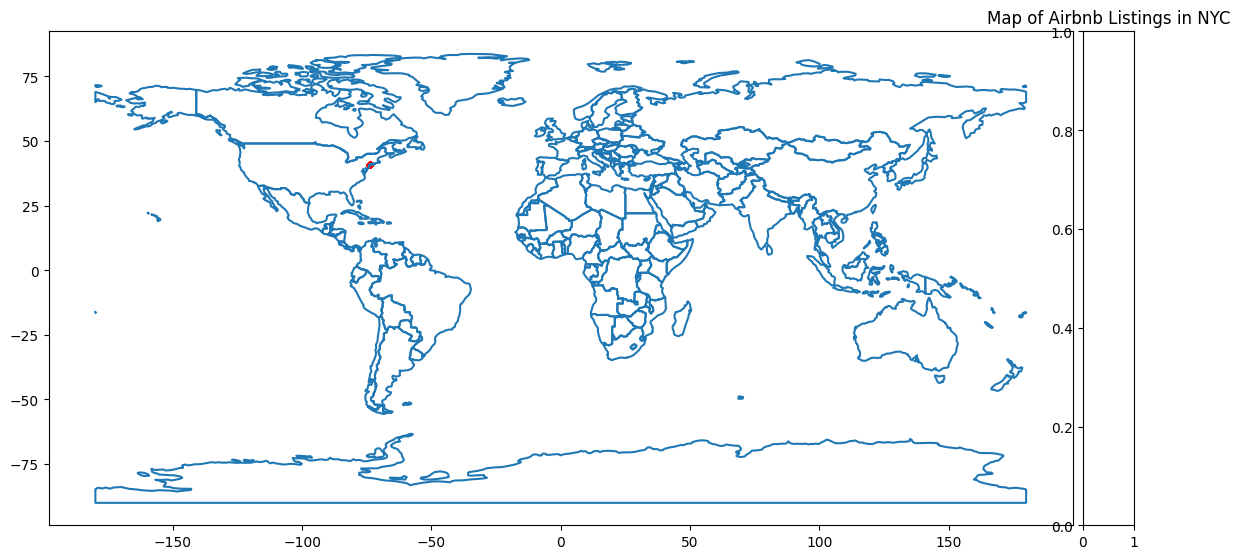

In [126]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'geometry' is the column with Point geometries
gdf = gpd.GeoDataFrame(df_edited, geometry=gpd.points_from_xy(df_edited.longitude, df_edited.latitude))

# Plotting the map
fig, ax = plt.subplots(figsize=(14, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red', alpha=0.5, markersize=10, legend=True, cax=cax)
plt.title('Map of Airbnb Listings in NYC')
plt.show()

In [127]:
import plotly.express as px

# Create an interactive map using Plotly
fig = px.scatter_mapbox(
    df_edited,
    lat="latitude",
    lon="longitude",
    hover_name="name",
    hover_data=["price", "room_type"],
    color="price",
    size="price",
    mapbox_style="carto-positron",
    zoom=10,
)

# Show the map
fig.show()